In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import tensorflow as tf
tf.set_random_seed(42)
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
# specifically for cnn

from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D
from keras.utils import np_utils
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

import skimage.io as io

Using TensorFlow backend.


In [0]:
import cv2
import numpy as np
import h5py
f = h5py.File('/content/gdrive/My Drive/ML/Data_set/Multi numbers/SVHN_single_grey1.h5', 'r')
#dset = f['key']
#data = np.array(dset[:,:,:])
#file = 'test.jpg'
#cv2.imwrite(file, data)
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
type(f)

h5py._hl.files.File

In [0]:
f['X_test']

<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">

In [0]:
f['X_train']

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">

In [0]:
f['y_test']

<HDF5 dataset "y_test": shape (18000,), type "|u1">

In [0]:
# Get the data
data = list(f['X_train'])
t = np.array(data)

In [0]:
t[:2].shape

(2, 32, 32)

In [0]:
trainX = np.array(f['X_train'])
trainY = np.array(f['y_train'])
testY = np.array(f['y_test'])
valX = np.array(f['X_val'])
testX = np.array(f['X_test'])
valY = np.array(f['y_val'])

In [0]:
trainX.shape
valX.shape
testX.shape
valY.shape
testY.shape
trainY.shape


(42000, 32, 32)

(60000, 32, 32)

(18000, 32, 32)

(60000,)

(18000,)

(42000,)

In [0]:
trainX = trainX[:40000]
trainY = trainY[:40000]
testY = testY[:10000]
valX = valX[:10000]
testX = testX[:10000]
valY = valY[:10000]

In [0]:
 np.unique(trainY)
np.unique(testY)
np.unique(valY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2], dtype=uint8)

In [0]:
print("using only train and test, as val looks dont have all clases for KNN and also reduced the data as scaling was taking time and more memory in calculating distance")

using only train and test, as val looks dont have all clases


In [0]:
traindnnY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testdnnY = tf.keras.utils.to_categorical(testY, num_classes=10)
#valdnnY = tf.keras.utils.to_categorical(valY, num_classes=10)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 6')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 7')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 0')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 3')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 0')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 7')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 3')

(-0.5, 31.5, 31.5, -0.5)

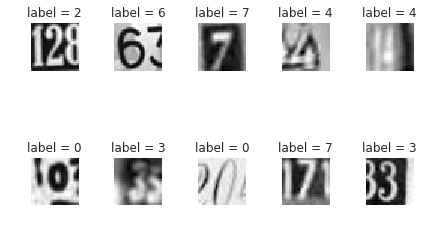

In [0]:
import matplotlib.pyplot as plt
 
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    #image = trainX[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    image = trainX[i]
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    x= 0
    y =0
    for x,y in enumerate(traindnnY[i]):
      if y > 0:
        plt.title('label = {}'.format(x))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('images/mnist_plot.png')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn import metrics

In [0]:
print("Knn model")

Knn model


In [0]:
# trainknnX = np.array(f['X_train'])
# trainknnY = np.array(f['y_train'])
# testknnY = np.array(f['y_test'])
# valknnX = np.array(f['X_val'])
# testknnX = np.array(f['X_test'])
# valknnY = np.array(f['y_val'])

In [0]:
# valknnX.shape
# testknnX.shape
# trainknnX.shape
# valknnY.shape
# testknnY.shape
# trainknnY.shape

(60000, 32, 32)

(18000, 32, 32)

(42000, 32, 32)

(60000,)

(18000,)

(42000,)

In [0]:
#valknnX /= 255
testX /= 255
trainX /= 255

In [0]:
trainX.shape
trainX.reshape(trainX.shape[0], 32*32)

(40000, 32, 32)

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       ...,
       [0.63195217, 0.6400302 , 0.6400302 , ..., 0.6315651 , 0.62949884,
        0.63346237],
       [0.58423096, 0.5920733 , 0.5939283 , ..., 0.54857767, 0.5508796 ,
        0.55872196],
       [0.23603137, 0.23820665, 0.2615647 , ..., 0.34702745, 0.2990792 ,
        0.23399608]], dtype=float32)

In [0]:
#TRAIN = True

#from sklearn.linear_model import LogisticRegression

#LR_fname = './LR_digit_classifier.pkl'
#if TRAIN:
x_train_ml = trainX.reshape(trainX.shape[0], 32*32).astype('float32')
KnnClass = KNeighborsClassifier(n_neighbors= 10)
KnnClass.fit(x_train_ml, trainY)
  #pkl = open(LR_fname, 'wb')
  #pickle.dump(KnnClass, pkl)
  #pkl.close()

#pkl = open(LR_fname, 'rb')
#logReg = pickle.load(pkl)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
x_val_ml = testX.reshape(testX.shape[0], 32*32).astype('float32')
predictions = KnnClass.predict(x_val_ml)
score = KnnClass.score(x_val_ml, testY)
print(score)

0.5131


In [0]:
print("Confusion Metrix:\n",metrics.confusion_matrix(predictions,testY))

Confusion Metrix:
 [[699  52  61  79  70 104 176  53 164 175]
 [ 36 732 127 133 140  97  56 130  73  76]
 [ 22  41 538  83  26  44  18  79  40  47]
 [ 22  41  71 384  37 166  45  52  75  60]
 [ 29  34  21  30 620  42  77  12  52  45]
 [ 21  23  13  88  11 387  75  14  65  56]
 [ 56  19  21  24  30  71 389  16 117  32]
 [  9  30  73  23  10  18  14 587  11  36]
 [ 53  11  28  58  23  74 125  12 382  70]
 [ 55  19  44  38  20  39  32  19  60 413]]


In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
bPrecis, bRecall, bFscore, bSupport = precision_recall_fscore_support(testY, predictions,average = 'macro' )
print("Precision ",bPrecis)
print("Recall ",bRecall)
print(classification_report(testY, predictions))

Precision  0.5262014657795044
Recall  0.5141377955966546
              precision    recall  f1-score   support

           0       0.43      0.70      0.53      1002
           1       0.46      0.73      0.56      1002
           2       0.57      0.54      0.56       997
           3       0.40      0.41      0.41       940
           4       0.64      0.63      0.64       987
           5       0.51      0.37      0.43      1042
           6       0.50      0.39      0.44      1007
           7       0.72      0.60      0.66       974
           8       0.46      0.37      0.41      1039
           9       0.56      0.41      0.47      1010

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.53      0.51      0.51     10000



In [0]:
print("Scaling takes too much time, and gets hanged, not able to get optimal value, As data set is huge for the limit taken")

In [0]:
#With Hyper Parameters Tuning
#SVM
#importing modules
from sklearn.model_selection import GridSearchCV
#from sklearn import svm
#making the instance
KnnClassG = KNeighborsClassifier(n_neighbors= 10)
#Hyper Parameters Set
params = {'n_neighbors': [10,15,20,25,30], 
          'weights': ['uniform','distance']}
#Making models with hyper parameters sets
modelG = GridSearchCV(KnnClassG, param_grid=params, cv=5,n_jobs=-1)
#Learning
modelG.fit(x_train_ml,trainY)
#The best hyper parameters set
print("Best Hyper Parameters:\n",modelG.best_params_)
#Prediction
prediction=model1.predict(score = KnnClass.score(x_val_ml, testY)
)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(predictions,testY))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(predictions,testY))


KeyboardInterrupt: ignored

In [0]:
print("Deep learning model")

Deep learning model


In [0]:
trainX = np.array(f['X_train'])
trainY = np.array(f['y_train'])
testY = np.array(f['y_test'])
valX = np.array(f['X_val'])
testX = np.array(f['X_test'])
valY = np.array(f['y_val'])

In [0]:
trainX.shape
valX.shape
testX.shape
valY.shape
testY.shape
trainY.shape

(42000, 32, 32)

(60000, 32, 32)

(18000, 32, 32)

(60000,)

(18000,)

(42000,)

In [0]:
np.unique(trainY)
np.unique(testY)
np.unique(valY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
traindnnY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testdnnY = tf.keras.utils.to_categorical(testY, num_classes=10)
valdnnY = tf.keras.utils.to_categorical(valY, num_classes=10)

In [0]:
np.unique(traindnnY)
np.unique(testdnnY)
np.unique(valdnnY)

array([0., 1.], dtype=float32)

array([0., 1.], dtype=float32)

array([0., 1.], dtype=float32)

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
valX = valX.astype('float32')


trainX /= 255
testX /= 255
valX /= 255

In [0]:
 valX.shape
 testX.shape
 trainX.shape
 valdnnY.shape
 testdnnY.shape
 traindnnY.shape

(60000, 32, 32)

(18000, 32, 32)

(42000, 32, 32)

(60000, 10)

(18000, 10)

(42000, 10)

In [0]:
print("model with Adam")

model with Adam


In [0]:

BATCH_SIZE = 100
EPOCHS = 30

In [0]:
#Initialize Sequential model
    # Define the Type of Model
model = Sequential()

    # Flatten Imgaes to Vector
model.add(Reshape((1024,), input_shape=(32, 32,)))

    # Layer 1
model.add(Dense(output_dim=128, init='he_normal',activation = "relu", bias=True))
model.add(keras.layers.BatchNormalization())

    # Layer 2
model.add(Dense(output_dim=256, init='he_normal',activation = "relu", bias=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.BatchNormalization())

    # Layer 3
model.add(Dense(output_dim=512, init='he_normal',activation = "relu", bias=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.BatchNormalization())


    # Layer 4
model.add(Dense(output_dim=1024, init='he_normal',activation = "relu", bias=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.BatchNormalization())

    # Layer 5
model.add(Dense(output_dim=10, init='he_normal',activation = "softmax", bias=True))


    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

    # Train the model
model.fit(trainX, traindnnY, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callback_list, verbose=True)
    #model1.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
    #          validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

    # Save model and training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="he_normal", use_bias=True)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="he_normal", use_bias=True)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="he_normal", use_bias=True)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: User

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 14s 422us/step - loss: 1.8109 - acc: 0.4178 - val_loss: 2.1098 - val_acc: 0.3561
Epoch 2/30
33600/33600 [==============================] - 12s 366us/step - loss: 1.1745 - acc: 0.6260 - val_loss: 1.7405 - val_acc: 0.4920
Epoch 3/30
33600/33600 [==============================] - 12s 364us/step - loss: 1.0281 - acc: 0.6745 - val_loss: 1.3896 - val_acc: 0.5607
Epoch 4/30
33600/33600 [==============================] - 12s 363us/step - loss: 0.9292 - acc: 0.7063 - val_loss: 1.1315 - val_acc: 0.6477
Epoch 5/30
33600/33600 [==============================] - 12s 363us/step - loss: 0.8800 - acc: 0.7222 - val_loss: 1.3965 - val_acc: 0.5511
Epoch 6/30
33600/33600 [==============================] - 12s 368us/step - loss: 0.8326 - acc: 0.7360 - val_loss: 0.8895 - val_acc: 0.7157
Epoch 7/30
33600/33600 [==============================] - 12s 363us/step - loss: 0.7847 - acc: 0.7565 - val_loss: 1.0

In [0]:
testnewY = model.predict_classes(testX)

In [0]:
bPrecis, bRecall, bFscore, bSupport = precision_recall_fscore_support(testY, testnewY,average = 'macro' )
print("Precision ",bPrecis)
print("Recall ",bRecall)
print(classification_report(testY, testnewY))

Precision  0.7580966724010414
Recall  0.7341247648224021
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.79      0.76      0.78      1828
           2       0.67      0.81      0.74      1803
           3       0.58      0.79      0.67      1719
           4       0.89      0.74      0.81      1812
           5       0.76      0.74      0.75      1768
           6       0.83      0.71      0.77      1832
           7       0.88      0.72      0.79      1808
           8       0.80      0.57      0.67      1812
           9       0.53      0.75      0.62      1804

    accuracy                           0.73     18000
   macro avg       0.76      0.73      0.74     18000
weighted avg       0.76      0.73      0.74     18000



In [0]:
print("Model with SGD and nestrov True")

Model with SGD and nestrov True


In [0]:
#Initialize Sequential model
from keras.optimizers import SGD
    # Define the Type of Model
model1 = Sequential()

    # Flatten Imgaes to Vector
model1.add(Reshape((1024,), input_shape=(32, 32,)))

    # Layer 1
model1.add(Dense(output_dim=128, init='he_normal',activation = "relu", bias=True))
model1.add(keras.layers.BatchNormalization())

    # Layer 2
model1.add(Dense(output_dim=256, init='he_normal',activation = "relu", bias=True))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.BatchNormalization())

    # Layer 3
model1.add(Dense(output_dim=512, init='he_normal',activation = "relu", bias=True))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.BatchNormalization())


    # Layer 4
model1.add(Dense(output_dim=1024, init='he_normal',activation = "relu", bias=True))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.BatchNormalization())

    # Layer 5
model1.add(Dense(output_dim=10, init='he_normal',activation = "softmax", bias=True))

learning_rate = 0.001
decay_rate = learning_rate / EPOCHS
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)
#Comile the model
model1.compile(optimizer=keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    # Loss and Optimizer
#model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

    # Train the model
model1.fit(trainX, traindnnY, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callback_list, verbose=True)
    #model1.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
    #          validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

    # Save model and training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="he_normal", use_bias=True)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="he_normal", use_bias=True)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 13s 399us/step - loss: 2.9313 - acc: 0.1135 - val_loss: 2.3726 - val_acc: 0.1496
Epoch 2/30
33600/33600 [==============================] - 11s 323us/step - loss: 2.7564 - acc: 0.1378 - val_loss: 2.2144 - val_acc: 0.1988
Epoch 3/30
33600/33600 [==============================] - 11s 316us/step - loss: 2.5970 - acc: 0.1588 - val_loss: 2.0954 - val_acc: 0.2614
Epoch 4/30
33600/33600 [==============================] - 11s 318us/step - loss: 2.4899 - acc: 0.1885 - val_loss: 1.9780 - val_acc: 0.3246
Epoch 5/30
33600/33600 [==============================] - 11s 315us/step - loss: 2.3675 - acc: 0.2178 - val_loss: 1.8650 - val_acc: 0.3729
Epoch 6/30
33600/33600 [==============================] - 10s 306us/step - loss: 2.2529 - acc: 0.2524 - val_loss: 1.7519 - val_acc: 0.4224
Epoch 7/30
33600/33600 [==============================] - 11s 317us/s

In [0]:
testnewsgdY = model1.predict_classes(testX)

In [0]:
bPrecis, bRecall, bFscore, bSupport = precision_recall_fscore_support(testY, testnewsgdY,average = 'macro' )
print("Precision ",bPrecis)
print("Recall ",bRecall)
print(classification_report(testY, testnewsgdY))


Precision  0.6941781158834187
Recall  0.6840575022945784
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1814
           1       0.64      0.75      0.69      1828
           2       0.74      0.71      0.73      1803
           3       0.62      0.65      0.63      1719
           4       0.81      0.73      0.77      1812
           5       0.74      0.61      0.67      1768
           6       0.66      0.69      0.67      1832
           7       0.79      0.72      0.75      1808
           8       0.52      0.69      0.59      1812
           9       0.70      0.62      0.66      1804

    accuracy                           0.68     18000
   macro avg       0.69      0.68      0.69     18000
weighted avg       0.69      0.68      0.69     18000



In [0]:
print("From above 3 models of KNN, DNN with Adam, DNN with SGD and Nestrov, On looking classification report, Since it is multi classification F1 score seems good for DNN with Adam when compared to other 2 models on class wise")

From above 3 models of KNN, DNN with Adam, DNN with SGD and Nestrov, On looking classification report, Since it is multi classification F1 score seems good for DNN with Adam when compared to other 2 models on class wise
